In [1]:
# Import packages

import pandas as pd 
import numpy as np 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from joblib import dump, load

pd.set_option('display.max_columns', None)

In [2]:
qb = pd.read_csv('qb_value_data/qb.csv')
qb = qb.drop(columns = ['Unnamed: 0'])

In [3]:
# Import selected model for testing

model_name = 'logistic_regression'
model_filepath = 'qb_value_saved_models/' + model_name + '.joblib'

clf = load(model_filepath)

In [4]:
# Add model predictions to the data frame

from qb_value_helper_functions import get_features, get_label

qb_features = get_features(qb)
qb_win_pred = clf.predict(qb_features)
qb_win_probs = clf.predict_proba(qb_features)[:,1]

qb['qb_win_pred'] = qb_win_pred
qb['qb_value'] = qb_win_probs

In [5]:
# See descriptive stats for qb value

qb.qb_value.describe()

count    4.745000e+03
mean     4.645021e-01
std      2.909013e-01
min      4.312666e-08
25%      2.031606e-01
50%      4.542313e-01
75%      7.145221e-01
max      9.991276e-01
Name: qb_value, dtype: float64

In [6]:
# See what factors were most important to qb value

feature_importance = qb_features.columns.to_frame().reset_index(drop=True)
feature_importance.columns = ['feature']
feature_importance['mean'] = qb_features.mean().to_numpy()
feature_importance['std'] = qb_features.std().to_numpy()
feature_importance['importance'] = clf.coef_[0]
feature_importance['importance'] = feature_importance['importance'] * feature_importance['std']
feature_importance['abs_importance'] = abs(feature_importance.importance)
feature_importance_sorted = feature_importance.sort_values(by='abs_importance', ascending=False)
feature_importance_sorted

,feature,mean,std,importance,abs_importance
0,passing_epa_per_attempt,0.027103,0.360407,1.84615,1.84615


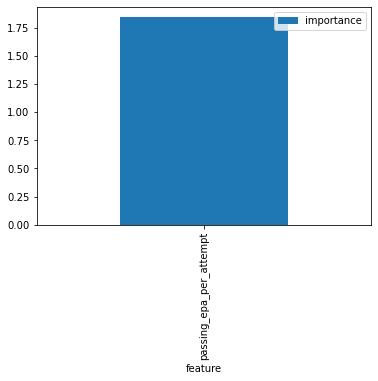

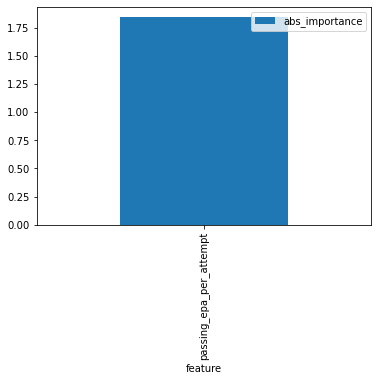

In [7]:
feature_importance_sorted.plot.bar(x='feature', y='importance')

feature_importance_sorted.plot.bar(x='feature', y='abs_importance')

In [8]:
# See where the algorithm went wrong

incorrect = qb[qb.qb_win != qb_win_pred]
pred_win_but_loss = len(incorrect[incorrect.qb_win_pred==1])
pred_loss_but_win = len(incorrect[incorrect.qb_win_pred==0])
total = len(incorrect)

print('Predicted Win, Actual Loss: {}, {}%'.format(pred_win_but_loss, np.round(pred_win_but_loss*100/total, 2)))
print('Predicted Loss, Actual Win: {}, {}%'.format(pred_loss_but_win, np.round(pred_loss_but_win*100/total, 2)))

Predicted Win, Actual Loss: 551, 48.98%
Predicted Loss, Actual Win: 574, 51.02%


In [9]:
incorrect.head(10)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,qb_win,passing_epa_per_attempt,yards_per_attempt,touchdowns_per_attempt,completion_percentage,qb_win_pred,qb_value
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,7.779734,30.0,1.681309,0.0,2.0,4.0,1.0,1.0,0.0,0,0.160485,8.000000,0.052632,0.631579,1,0.604567
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,10.352312,10.0,1.929123,0.0,1.0,3.0,1.0,0.0,0.0,0,0.255248,6.969697,0.060606,0.727273,1,0.712989
6,2014,1,CIN,BAL,23,16,A. Dalton,39,303.0,25.0,11.252418,1.0,129.0,172.0,-3.613447,26.073280,-2.044220,7.354762,5.0,-3.897657,0.0,0.0,1.0,0.0,0.0,0.0,0,0.288524,7.769231,0.025641,0.641026,1,0.746569
12,2014,1,HOU,WAS,17,6,R. Fitzpatrick,22,206.0,14.0,9.612591,1.0,97.0,109.0,3.430416,13.002432,-2.874629,9.895559,12.0,0.282968,0.0,0.0,3.0,1.0,0.0,0.0,0,0.436936,9.363636,0.045455,0.636364,1,0.863022
20,2014,1,MIA,NE,33,20,R. Tannehill,32,178.0,18.0,-5.483662,2.0,76.0,102.0,1.586622,8.987242,-5.776945,-1.597986,0.0,-0.908166,0.0,1.0,3.0,2.0,1.0,1.0,1,-0.171364,5.562500,0.062500,0.562500,0,0.218345
26,2014,1,PHI,JAX,34,17,N. Foles,44,322.0,27.0,-11.213566,2.0,183.0,139.0,1.699987,19.193558,-1.086598,-11.213566,0.0,0.000000,0.0,5.0,4.0,3.0,2.0,1.0,1,-0.254854,7.318182,0.045455,0.613636,0,0.154073
33,2014,2,ARI,NYG,25,14,D. Stanton,29,167.0,14.0,-3.911987,0.0,117.0,50.0,6.287091,5.216219,-7.342040,-3.911987,0.0,0.000000,0.0,4.0,10.0,0.0,0.0,0.0,1,-0.134896,5.758621,0.000000,0.482759,0,0.251895
40,2014,2,CLE,NO,26,24,B. Hoyer,40,204.0,24.0,1.381880,1.0,110.0,94.0,-1.045171,13.762691,-1.256537,1.381880,0.0,0.000000,0.0,1.0,6.0,0.0,0.0,0.0,1,0.034547,5.100000,0.025000,0.600000,0,0.445079
48,2014,2,KC,DEN,17,24,A. Smith,42,255.0,26.0,11.218429,0.0,166.0,89.0,10.566546,13.780125,0.225186,12.394057,38.0,1.175629,0.0,2.0,5.0,1.0,0.0,0.0,0,0.267105,6.071429,0.000000,0.619048,1,0.725256
49,2014,2,LA,TB,19,17,A. Davis,29,235.0,22.0,12.599847,0.0,172.0,63.0,12.930792,8.523504,12.245806,11.359623,0.0,-1.240224,0.0,2.0,4.0,1.0,0.0,0.0,0,0.434477,8.103448,0.000000,0.758621,1,0.861527


In [10]:
# Look at some of the best qbs by qb value

qb_avg_value = qb.groupby(by='qb').qb_value.agg(['mean', 'min', 'max', 'count'])
qb_avg_value.sort_values(by='mean', ascending=False)

,mean,min,max,count
qb,,,,
P. Mahomes,0.681669,0.133497,0.983637,83
L. McCown,0.640578,0.640578,0.640578,1
T. Romo,0.622027,0.003453,0.994478,21
T. Brady,0.601519,0.019252,0.990478,156
D. Brees,0.592173,0.012999,0.988599,107
...,...,...,...,...
L. Falk,0.029341,0.001034,0.073721,3
B. DiNucci,0.024844,0.024844,0.024844,1
C. Jones,0.015645,0.015645,0.015645,1


In [11]:
# Look at those that have more than 10 games played 

qb_avg_value_many_games = qb_avg_value.reset_index()
qb_avg_value_many_games.columns = ['qb', 'mean', 'min', 'max', 'cnt']
qb_avg_value_many_games[qb_avg_value_many_games.cnt > 10].sort_values(by='mean', ascending=False).head(50)

,qb,mean,min,max,cnt
116,P. Mahomes,0.681669,0.133497,0.983637,83
143,T. Romo,0.622027,0.003453,0.994478,21
136,T. Brady,0.601519,0.019252,0.990478,156
39,D. Brees,0.592173,0.012999,0.988599,107
69,J. Garoppolo,0.587737,0.014622,0.985435,61
4,A. Rodgers,0.584694,0.006215,0.992306,139
118,P. Rivers,0.563929,0.042481,0.995742,115
51,D. Watson,0.559796,0.014116,0.990050,57
30,C. Palmer,0.552126,0.044088,0.948762,45
71,J. Herbert,0.549408,0.040552,0.958322,41


In [12]:
incorrect.sort_values(by='qb_value', ascending=True).head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,qb_win,passing_epa_per_attempt,yards_per_attempt,touchdowns_per_attempt,completion_percentage,qb_win_pred,qb_value
1950,2017,11,BUF,LAC,24,54,N. Peterman,14,66.0,6.0,-21.571390,0.0,35.0,31.0,0.533739,4.087936,-16.712300,-22.670650,4.0,-1.099259,0.0,0.0,3.0,1.0,0.0,5.0,1,-1.540814,4.714286,0.000000,0.428571,0,0.000251
1073,2015,17,TEN,IND,24,30,Z. Mettenberger,13,38.0,5.0,-13.616711,0.0,16.0,22.0,-2.853674,6.473917,-28.612394,-12.428435,5.0,1.188275,1.0,1.0,2.0,0.0,0.0,1.0,1,-1.047439,2.923077,0.000000,0.384615,0,0.003132
1805,2017,6,BAL,CHI,24,27,J. Flacco,42,182.0,24.0,-29.153835,0.0,79.0,101.0,-6.840649,8.361546,-7.944925,-23.793703,0.0,0.000000,0.0,3.0,3.0,1.0,1.0,2.0,1,-0.694139,4.333333,0.000000,0.571429,0,0.018832
2674,2018,16,NE,BUF,24,12,T. Brady,24,126.0,13.0,-16.553888,1.0,33.0,93.0,-2.915091,7.531805,-16.481543,-12.241974,0.0,0.000000,0.0,1.0,3.0,1.0,1.0,2.0,1,-0.689745,5.250000,0.041667,0.541667,0,0.019252
4292,2021,15,IND,NE,27,17,C. Wentz,12,57.0,5.0,-7.869019,1.0,27.0,30.0,-0.229483,4.746672,-25.482048,-2.417883,19.0,5.451136,0.0,1.0,1.0,0.0,0.0,1.0,1,-0.655752,4.750000,0.083333,0.416667,0,0.022830
1827,2017,6,SF,WAS,24,26,B. Hoyer,11,34.0,4.0,-7.174073,0.0,34.0,0.0,-0.432107,0.080627,-18.713684,-7.174073,0.0,0.000000,0.0,1.0,4.0,0.0,0.0,0.0,1,-0.652188,3.090909,0.000000,0.363636,0,0.023241
200,2014,7,JAX,CLE,24,6,B. Bortles,31,159.0,17.0,-20.167440,1.0,52.0,107.0,-4.476719,13.827379,-9.708472,-16.901745,38.0,3.265695,0.0,2.0,5.0,0.0,0.0,3.0,1,-0.650563,5.129032,0.032258,0.548387,0,0.023431
2686,2018,17,ARI,SEA,24,27,J. Rosen,34,149.0,18.0,-21.220106,1.0,104.0,45.0,0.656600,7.169467,-5.250452,-21.220106,0.0,0.000000,0.0,6.0,8.0,2.0,2.0,0.0,1,-0.624121,4.382353,0.029412,0.529412,0,0.026739
2556,2018,13,BAL,ATL,26,16,L. Jackson,21,125.0,12.0,-13.105216,0.0,86.0,39.0,3.048341,5.212182,-11.098816,-13.311083,78.0,-0.205866,1.0,2.0,1.0,3.0,1.0,0.0,1,-0.624058,5.952381,0.000000,0.571429,0,0.026747
3344,2020,2,SF,NYJ,31,13,N. Mullens,11,71.0,8.0,-6.854055,0.0,30.0,41.0,-2.925593,7.010737,5.176957,-6.854055,0.0,0.000000,0.0,2.0,5.0,1.0,0.0,1.0,1,-0.623096,6.454545,0.000000,0.727273,0,0.026876


In [13]:
qb_avg_value.loc['T. Brady']

mean       0.601519
min        0.019252
max        0.990478
count    156.000000
Name: T. Brady, dtype: float64

In [14]:
# Look at some of the best qbs by qb value, season by season

qb_avg_value = qb.groupby(by=['qb', 'season']).qb_value.agg(['mean', 'min', 'max', 'count'])
qb_avg_value[150:200]

mean       min       max  count
qb          season                                     
D. Carr     2014    0.322583  0.053888  0.885683     16
            2015    0.441758  0.046929  0.878453     16
            2016    0.582165  0.069554  0.827563     15
            2017    0.451004  0.015122  0.936885     15
            2018    0.427761  0.051197  0.871798     16
            2019    0.577714  0.107153  0.953091     16
            2020    0.525601  0.012666  0.916836     15
            2021    0.439280  0.110547  0.938874     18
            2022    0.459368  0.060872  0.871595      9
D. Fales    2017    0.370834  0.370834  0.370834      1
D. Haskins  2019    0.283575  0.009177  0.955692      8
            2020    0.206200  0.032790  0.397489      7
D. Hodges   2019    0.378252  0.037545  0.791572      7
D. Jones    2019    0.338230  0.014081  0.936861     12
            2020    0.352823  0.021074  0.714944     14
            2021    0.409074  0.035527  0.845524     11
            2022    0.483209  0.117563  0.960128      9
D. Kizer    2017    0.214595  0.004376  0.682173     15
            2018    0.037760  0.037760  0.037760      1
D. Lock     2019    0.519320  0.130807  0.953876      5
            2020    0.354889  0.059125  0.778479     12
            2021    0.417091  0.063063  0.672009      5
D. Mills    2021    0.355766  0.000669  0.939907     13
            2022    0.255023  0.073602  0.580260      8
D. Orlovsky 2015    0.395450  0.395450  0.395450      1
D. Prescott 2016    0.670449  0.018879  0.979206     16
            2017    0.418596  0.006091  0.923071     16
            2018    0.444505  0.084118  0.869276     18
            2019    0.607715  0.197125  0.988336     16
            2020    0.516433  0.257642  0.722479      5
            2021    0.568338  0.096518  0.987772     17
            2022    0.463144  0.068980  0.916537      4
D. Stanton  2014    0.371201  0.083265  0.750441      8
            2015    0.030222  0.030222  0.030222      1
            2016    0.133664  0.083981  0.183347      2
            2017    0.257545  0.013705  0.481444      5
D. Watson   2017    0.535848  0.014116  0.927053      7
            2018    0.517194  0.017474  0.972630     17
            2019    0.548692  0.028818  0.990050     17
            2020    0.627336  0.194825  0.965376     16
E. Manning  2014    0.481667  0.023967  0.980738     16
            2015    0.500760  0.010493  0.969525     16
            2016    0.390896  0.067346  0.737477     17
            2017    0.321001  0.023317  0.687874     15
            2018    0.502172  0.096393  0.922348     16
            2019    0.366047  0.200089  0.484067      4
E. Manuel   2014    0.370499  0.082336  0.743627      4
            2015    0.238728  0.077297  0.400158      2
            2016    0.122546  0.122546  0.122546      1
            2017    0.179904  0.075121  0.284686      2

In [15]:
# Look at games for current season

qb[(qb.season == 2022) & (qb.team == 'GB')]

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,qb_win,passing_epa_per_attempt,yards_per_attempt,touchdowns_per_attempt,completion_percentage,qb_win_pred,qb_value
4450,2022,1,GB,MIN,7,23,A. Rodgers,34,195.0,22.0,-11.627544,0.0,61.0,134.0,-6.501235,20.848576,-2.784771,-11.627544,0.0,0.000000,0.0,4.0,5.0,1.0,1.0,1.0,0,-0.341987,5.735294,0.000000,0.647059,0,0.104394
4480,2022,2,GB,CHI,27,10,A. Rodgers,25,234.0,19.0,11.532071,2.0,104.0,130.0,3.426131,15.460117,4.686914,7.936544,11.0,-3.595527,0.0,3.0,4.0,1.0,1.0,0.0,1,0.461283,9.360000,0.080000,0.760000,1,0.877110
4512,2022,3,GB,TB,14,12,A. Rodgers,35,255.0,27.0,0.730554,2.0,77.0,178.0,-13.849911,25.629654,10.921985,4.507948,0.0,0.000000,0.0,1.0,6.0,2.0,1.0,1.0,0,0.020873,7.285714,0.057143,0.771429,0,0.427852
4544,2022,4,GB,NE,27,24,A. Rodgers,35,251.0,21.0,-4.546093,2.0,123.0,128.0,5.398765,8.992539,0.136496,0.181049,1.0,-0.244707,0.0,1.0,3.0,2.0,1.0,1.0,1,-0.129888,7.171429,0.057143,0.600000,0,0.256759
4578,2022,5,GB,NYG,22,27,A. Rodgers,39,222.0,25.0,2.820491,2.0,72.0,150.0,-4.275764,22.607023,-2.485055,2.820491,0.0,0.000000,0.0,2.0,6.0,1.0,0.0,0.0,0,0.072320,5.692308,0.051282,0.641026,0,0.493229
4609,2022,6,GB,NYJ,10,27,A. Rodgers,41,246.0,26.0,-13.293249,1.0,146.0,100.0,-1.053414,11.738617,-2.022382,-18.085117,0.0,-4.791869,0.0,4.0,9.0,2.0,1.0,0.0,0,-0.324226,6.000000,0.024390,0.634146,0,0.113211
4639,2022,7,GB,WAS,21,23,A. Rodgers,34,194.0,23.0,-2.831697,2.0,102.0,98.0,-4.338515,12.916915,-3.858410,-2.831697,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0,-0.083285,5.705882,0.058824,0.676471,0,0.304881
4668,2022,8,GB,BUF,17,27,A. Rodgers,30,203.0,19.0,-1.400027,2.0,101.0,102.0,1.322018,11.660726,-0.268133,-0.208485,11.0,1.191543,0.0,2.0,4.0,0.0,0.0,1.0,0,-0.046668,6.766667,0.066667,0.633333,0,0.346018
4697,2022,9,GB,DET,9,15,A. Rodgers,44,291.0,23.0,-13.542640,1.0,182.0,109.0,8.121739,15.959337,-4.740061,-5.769335,41.0,7.773305,0.0,1.0,5.0,2.0,0.0,3.0,0,-0.307787,6.613636,0.022727,0.522727,0,0.121944
4724,2022,10,GB,DAL,31,28,A. Rodgers,20,224.0,14.0,6.877323,3.0,134.0,90.0,10.976910,10.889734,11.042888,8.209897,7.0,1.332574,0.0,2.0,2.0,1.0,1.0,0.0,1,0.343866,11.200000,0.150000,0.700000,1,0.796390


In [17]:
qb[qb.season == 2022].groupby(by='qb').mean()['qb_value'].sort_values(ascending=False)

qb
T. Tagovailoa     0.769523
P. Mahomes        0.728541
J. Garoppolo      0.611671
J. Allen          0.599625
J. Hurts          0.568734
J. Burrow         0.566694
R. Tannehill      0.562186
T. Brady          0.527819
T. Lawrence       0.512745
C. McCoy          0.497590
G. Smith          0.486797
D. Jones          0.483209
J. Goff           0.475468
B. Zappe          0.465566
D. Prescott       0.463144
J. Brissett       0.462263
A. Dalton         0.460811
D. Carr           0.459368
J. Herbert        0.438186
M. Mariota        0.437684
L. Jackson        0.432289
K. Cousins        0.427290
A. Rodgers        0.393561
J. Winston        0.372313
T. Heinicke       0.362106
M. Ryan           0.355774
M. Stafford       0.346516
T. Bridgewater    0.343744
K. Murray         0.342455
R. Wilson         0.338826
M. Trubisky       0.333020
J. Flacco         0.331440
C. Rush           0.302958
Z. Wilson         0.301584
B. Mayfield       0.297878
K. Pickett        0.293423
P. Walker         0.29303